<a href="https://colab.research.google.com/github/farman1998/Data-Analytics-AIF/blob/main/Advance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. IMPORT LIBRARIES

In [1]:
import pandas as pd  # Data manipulation
import pytz  # Time zones
import re  # Regular expressions
from tqdm import tqdm  # Progress bars
import random  # Random values

import nltk  # Natural language processing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA  # Sentiment analysis
nltk.download('vader_lexicon')  # Download VADER lexicon
from nltk.corpus import stopwords  # Stopwords
nltk.download('stopwords')  # Download stopwords corpus

from wordcloud import WordCloud  # Word cloud

import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization
import plotly.express as px  # Interactive plotting
import plotly.subplots as sp

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#2. PREPRATION

In [2]:
# Set the plotting style to 'darkgrid'.
sns.set_style('darkgrid')

# Create an instance of the SentimentIntensityAnalyzer for sentiment analysis.
sia = SIA()

# Get the stopwords for the Portuguese language.
stpwrds = stopwords.words('english')

# Define a custom color map for sentiment categories based on Kaggle palette.
custom_colors_map = {'Negative':'#FFA07A','Neutral':'#FFFFFF', 'Positive':'#20BEFF'}

#3. DATA LOAD

In [9]:
df = pd.read_csv('data.csv')
data = df.copy()
# View the collected data.
data.head()

,register_index,post_id,comment_id,author,datetime,title,url,score,comments,text,author_post_karma,tag
0,148pr0qjo1x05j,148pr0q,jo1x05j,Mega_Nidoking,2023-06-14 01:00:36,NaN,NaN,-5.0,NaN,Stopped watching after she said borned Stop...,81979.0,Cringe
1,148pr0qjo1raa8,148pr0q,jo1raa8,Love_God551,2023-06-14 00:06:25,NaN,NaN,2.0,NaN,He s hilarious and his delivery is flawless,536762.0,Cringe
2,148pr0qjo1zj6f,148pr0q,jo1zj6f,juicy_socks124,2023-06-14 01:24:52,NaN,NaN,1.0,NaN,Doesn t mean you know how what someone does fr...,15611.0,Cringe
3,148peifpost,148peif,NaN,EntertainerOk2,2023-06-13 20:55:47,Anyma's visuals are ridiculous during his sets,https://www.reddit.com/r/tiktokcringe/comments...,1833.0,230.0,Anyma s visuals are ridiculous during his sets,147.0,Cool
4,148peifjo16bjn,148peif,jo16bjn,AutoModerator,2023-06-13 20:56:46,NaN,NaN,1.0,NaN,Welcome to r TikTokCringe This is a me...,1000.0,Cool


#4.TRANSFORMATION

In [10]:
# Fill tags with 'Sem Tag' if they are missing.
data.tag.fillna('Without Tag', inplace=True)

# Count the occurrences of each tag in the 'tag' column of the 'data' DataFrame.
tags = data.tag.value_counts()

# Reset the index of the 'tags' Series to convert it into a DataFrame.
tags = tags.reset_index()

In [11]:
# General transformation in the text
def transformation(df, mc, ac):
    # mc = main_column
    # ac = another_column

    # Replace empty main_column values with another_column values.
    df[mc] = df.apply(lambda x: x[ac] if x[mc] == '' else x[mc], axis=1)

    df[mc] = df[mc].str.lower()
    df[mc] = df[mc].apply(lambda x: re.sub('@[^\s]+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\B#\S+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r"http\S+", "", x))
    df[mc] = df[mc].apply(lambda x: ' '.join(re.findall(r'\w+', x)))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+[b-zA-Z]\s+', ' ', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))
    df[mc] = df[mc].apply(lambda x: ' '.join([word for word in x.split() if word not in stpwrds]))

    df['words'] = df[mc].apply(lambda x: re.findall(r'\w+', x))
    df['words_count'] = df.words.apply(len)
    df['length'] = df[mc].apply(len)
    df['hour'] = df.datetime.apply(lambda x: x.hour)

    return df

data.datetime = pd.to_datetime(data.datetime)
data.text = data.text.astype(str)
data.title = data.title.astype(str)

data = transformation(data, 'text', 'title')

In [12]:
# View the transformed data.
data.head()

,register_index,post_id,comment_id,author,datetime,title,url,score,comments,text,author_post_karma,tag,words,words_count,length,hour
0,148pr0qjo1x05j,148pr0q,jo1x05j,Mega_Nidoking,2023-06-14 01:00:36,nan,NaN,-5.0,NaN,stopped watching said borned stop stop,81979.0,Cringe,"[stopped, watching, said, borned, stop, stop]",6,38,1
1,148pr0qjo1raa8,148pr0q,jo1raa8,Love_God551,2023-06-14 00:06:25,nan,NaN,2.0,NaN,hilarious delivery flawless,536762.0,Cringe,"[hilarious, delivery, flawless]",3,27,0
2,148pr0qjo1zj6f,148pr0q,jo1zj6f,juicy_socks124,2023-06-14 01:24:52,nan,NaN,1.0,NaN,mean know someone look like like logic sooooo ...,15611.0,Cringe,"[mean, know, someone, look, like, like, logic,...",35,199,1
3,148peifpost,148peif,NaN,EntertainerOk2,2023-06-13 20:55:47,Anyma's visuals are ridiculous during his sets,https://www.reddit.com/r/tiktokcringe/comments...,1833.0,230.0,anyma visuals ridiculous sets,147.0,Cool,"[anyma, visuals, ridiculous, sets]",4,29,20
4,148peifjo16bjn,148peif,jo16bjn,AutoModerator,2023-06-13 20:56:46,nan,NaN,1.0,NaN,welcome tiktokcringe message directed newcomer...,1000.0,Cool,"[welcome, tiktokcringe, message, directed, new...",89,681,20


#5.SENTIMENT ANALYSIS

In [13]:
def sentiment_classification(x: float):
    return 'Negative' if x < -0.25 else 'Positive' if x > 0.25 else 'Neutral'

data['sentiment_eval'] = [sia.polarity_scores(x)['compound'] for x in tqdm(data['text'])]

data['class_sentiment'] = data['sentiment_eval'].apply(sentiment_classification)

100%|██████████| 108224/108224 [00:25<00:00, 4255.25it/s]


#6. Exploratory Data Analysis and Visualization

In [16]:
print(f'{data.shape[0]} Rows')

108224 Rows


In [17]:
print(f'{data.shape[1]} Columns')

18 Columns


In [18]:
# Extract post rows.
data_post = data[data['comment_id'].isnull()]

# Extract comment rows.
data_comment = data[data['comment_id'].notnull()]

## <center><div style="font-family: 'Roboto', sans-serif;"> Count by Sentiment </div></center>

In [14]:
# Function to create a custom histogram.
def senti_plot(df, type: str):
    # type = 'post' or 'comment'
    fig = px.histogram(
    df['class_sentiment'],
    y="class_sentiment",
    title=f'Sentiment Analysis from {type}',
    color='class_sentiment',
    color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the sentiment and count.
    fig.update_traces(hovertemplate='%{y}<br>Count: %{x}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Sentiment', xaxis_title='Count', legend_title='Sentiment')

    # Display the figure.
    return fig

In [19]:
# Histogram from posts.
senti_plot(data_post, 'Posts')

In [20]:
# Histogram from comments.
senti_plot(data_comment, 'Comments')

## <center><div style="font-family: 'Roboto', sans-serif;"> Count by Hour and Sentiment </div></center>

In [21]:
def tags_plot(df, type: str):
    sentiment_by_tag = df.groupby(['tag', 'class_sentiment']).size().reset_index(name='counts')

    # Pivot the data to reshape it with 'tag' as the index, 'class_sentiment' as columns, and 'counts' as values.
    sentiment_by_tag = sentiment_by_tag.pivot(index='tag',columns='class_sentiment',values='counts').reset_index().fillna(0)

    # Calculate the total count for each tag.
    try:
        sentiment_by_tag['Total'] = sentiment_by_tag['Negative'] + sentiment_by_tag['Neutral'] + sentiment_by_tag['Positive']
    except:
        sentiment_by_tag['Neutral'] = 0
        sentiment_by_tag['Total'] = sentiment_by_tag['Negative'] + sentiment_by_tag['Neutral'] + sentiment_by_tag['Positive']

    # Calculate the percentage of each sentiment category for each tag.
    sentiment_by_tag['Negative'] = (sentiment_by_tag['Negative'] / sentiment_by_tag['Total']) * 100
    sentiment_by_tag['Neutral'] = (sentiment_by_tag['Neutral'] / sentiment_by_tag['Total']) * 100
    sentiment_by_tag['Positive'] = (sentiment_by_tag['Positive'] / sentiment_by_tag['Total']) * 100

    # Create a stacked bar plot using Plotly Express.
    fig = px.bar(
        data_frame=sentiment_by_tag,
        x='tag',
        y=['Negative', 'Neutral', 'Positive'],
        title=f'Sentiment Analysis by Tag from {type}',
        barmode='stack',
        color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the tag and percentage.
    fig.update_traces(hovertemplate='%{x}<br>Percentage: %{y:.2f}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Percentage', xaxis_title='Tag', legend_title='Sentiment', legend=dict(traceorder='reversed'))

    # Update the trace names to title case.
    fig.for_each_trace(lambda t: t.update(name=t.name.title()))

    # Display the plot.
    fig.show()

In [22]:
# Hourly from posts.
tags_plot(data_post, 'Posts')

In [23]:
# Hourly from comments.
tags_plot(data_comment, 'Comments')

## <center><div style="font-family: 'Roboto', sans-serif;"> Count by Hour and Sentiment </div></center>

In [24]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0' + h
    h = h + ":00"
    return h

def hourly_plot(df, type: str):
    # Group the data by 'hour' and 'class_sentiment' columns and calculate the counts.
    combined_hourly = df.groupby(['hour', 'class_sentiment']).size().reset_index(name='counts')

    # Correct the lack of data
    if sum(combined_hourly['class_sentiment'] == 'Neutral') <= 0:
        insert = pd.DataFrame.from_dict({'hour':[0], 'class_sentiment':['Neutral'], 'counts':[0]})
        combined_hourly = combined_hourly.append(insert)

    # Apply the 'format_hour' function to format the 'hour' column.
    combined_hourly['hour'] = combined_hourly['hour'].apply(format_hour)

    # Create a base DataFrame with all hours from 0 to 23.
    hour_base = pd.DataFrame({'hour': [format_hour(x) for x in range(0, 24)]})

    # Merge the base DataFrame with the grouped data to fill missing hours with 0 counts.
    combined_hourly = pd.merge(hour_base, combined_hourly, on='hour', how='left')

    # Pivot the data to reshape it with 'hour' as the index, sentiment categories as columns, and counts as values.
    combined_hourly = combined_hourly.pivot(index='hour',columns='class_sentiment',values='counts').reset_index().fillna(0)

    # Reorder the columns of the DataFrame.
    combined_hourly = combined_hourly[['hour', 'Negative', 'Neutral', 'Positive']]

    # Create a stacked bar plot using Plotly Express.
    fig = px.bar(
        data_frame=combined_hourly,
        x='hour',
        y=['Negative','Neutral','Positive'],
        title=f'Sentiment Analysis by Hour from {type}',
        barmode='stack',
        color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the count.
    fig.update_traces(hovertemplate='Count: %{y}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Posts', xaxis_title='Hour', legend_title='Sentiment')

    # Update the trace names to title case.
    fig.for_each_trace(lambda t: t.update(name=t.name.title()))

    # Set the legend order as Positive, Neutral, Negative.
    fig.update_layout(legend=dict(traceorder='reversed'))

    # Display the plot.
    fig.show()

In [25]:
# Hourly from posts.
hourly_plot(data_post, 'Posts')

In [26]:
# Hourly from comments.
hourly_plot(data_comment, 'Comments')

## <center><div style="font-family: 'Roboto', sans-serif;"> Word Cloud by Posts </div></center>


In [27]:
# Function to flatten a nested list.
def flatten_list(l):
    return [x for y in l for x in y]

# Function to generate a colored WordCloud.
def generate_word_cloud(text, color_func, title, ax):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", color_func=color_func).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=30)
    ax.axis("off")

# Function to generate word clouds.
def generate_word_clouds(pos_doc, neu_doc, neg_doc):
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))  # Change to 1 row and 3 columns

    titles = ["Positive Words", "Neutral Words", "Negative Words"]
    docs = [pos_doc, neu_doc, neg_doc]
    color_funcs = [lambda *args, **kwargs: custom_colors_map['Positive'],
                   lambda *args, **kwargs: custom_colors_map['Neutral'],
                   lambda *args, **kwargs: custom_colors_map['Negative']]

    for i, (doc, color_func, title) in enumerate(zip(docs, color_funcs, titles)):
        generate_word_cloud(" ".join(doc), color_func, title, axes[i])

    plt.tight_layout()
    plt.show()

def word_clouds(df):
    # Sort data by 'hour' in descending order.
    sentiment_sorted = df.sort_values('hour', ascending=False)

    # Get top 100 records for each sentiment category
    positive_top_100 = sentiment_sorted[sentiment_sorted['class_sentiment'] == "Positive"].iloc[:100]
    negative_top_100 = sentiment_sorted[sentiment_sorted['class_sentiment'] == "Negative"].iloc[:100]
    neutral_top_100 = sentiment_sorted[sentiment_sorted['class_sentiment'] == "Neutral"].iloc[:100]

    # Function to remove stopwords.
    cleanup = lambda x: [y for y in x.split() if y not in stpwrds]
    neg_doc = flatten_list(negative_top_100['text'].apply(cleanup))
    pos_doc = flatten_list(positive_top_100['text'].apply(cleanup))

    if len(neutral_top_100) == 0:
        neu_doc = ['_']
    else:
        neu_doc = flatten_list(neutral_top_100['text'].apply(cleanup))

    generate_word_clouds(pos_doc, neu_doc, neg_doc)

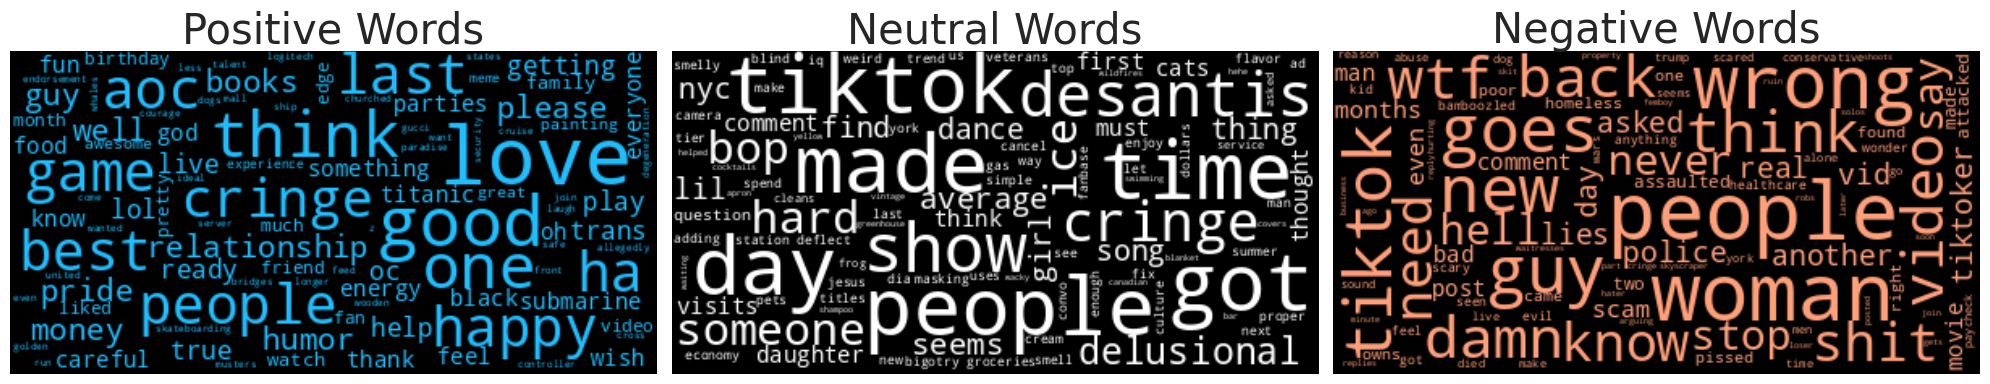

In [29]:
# Word clouds from posts.
word_clouds(data_post)

## <center><div style="font-family: 'Roboto', sans-serif;"> Word Cloud by Comments </div></center>

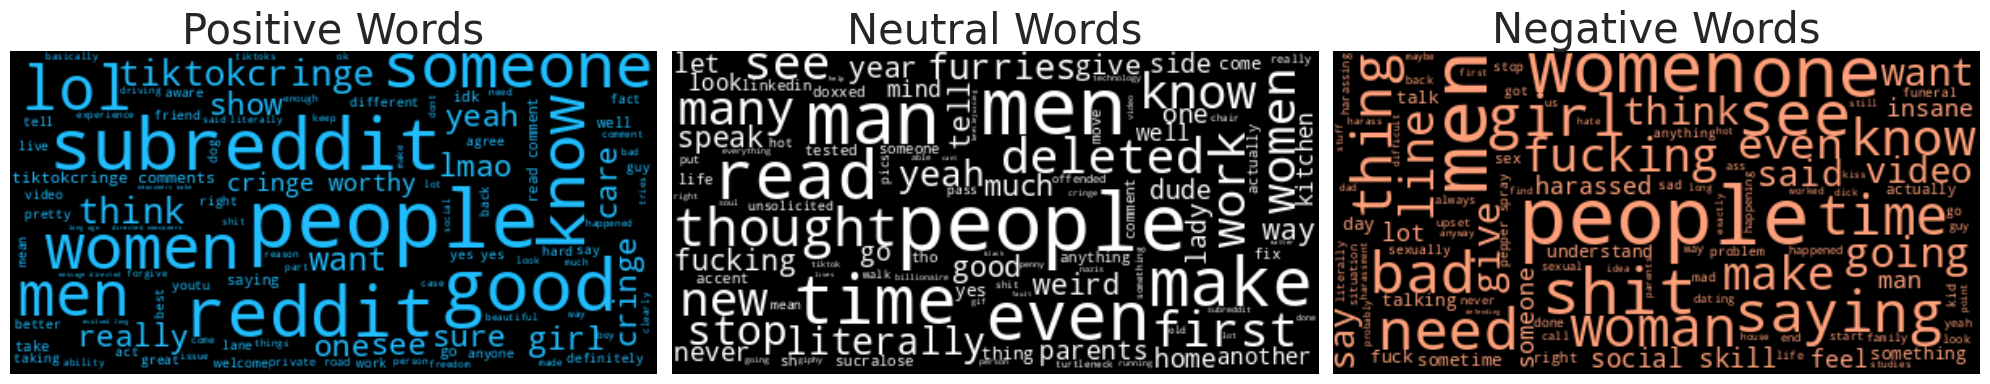

In [31]:
# Word clouds from comments.
word_clouds(data_comment)

***
<br>
<div style="background-color:#20BEFF;
            border-radius: 7px;
            padding: 21px;
            font-family: 'Roboto', sans-serif;
            font-size:18px;
            line-height: 1.7em;">
    <p style="color:white;
              text-align: center;">Thank you for coming here! I hope you enjoyed my notebook, and please consider liking or sharing it to make it more accessible to others! Feel free to leave a comment; both positive and constructive feedback will be valuable to me! You are always welcome here!</p></div>

<center><img src='https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExODFkM2Q5N2NhMDVmYTNmYjA2YTI3NTk0YjJiZmNjZjgyNTYwZWQ0ZCZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PXRz/U8NDCmPOnqcEYl1oav/giphy.gif'
     height=54px width=288px font=50px /></center>    
